In [1]:
%matplotlib inline
%autocall 1
from pylab import *
import makemySDSSlibv2 as makemySDSS
import pylab as pl
import pyfits
from astLib import astWCS, astImages
import pyff


Automatic calling is: Smart


In [2]:
frame,framehdr  = pyfits.getdata('frame-g-001737-6-0011.fits', header=1)
framewcs = astWCS.WCS('frame-g-001737-6-0011.fits')

In [3]:
objid, ra,dec, run,rerun,camcol,field, Rp = 1237652936176894483,309.097804246745,-4.61874142891258,1737,301,6,11,32.53249
SIZERP = 5.
SZdeg  = float(2.*SIZERP * Rp / 3600.)

In [4]:
framewcs.wcs2pix(ra,dec)

[1707.3105232127195, 971.0427348337241]

In [38]:
stamp = astImages.clipImageSectionWCS(frame,framewcs, ra , dec, float(SZdeg))

x0_obj, y0_obj = stamp['wcs'].wcs2pix(ra, dec)
stamp['wcs'].pix2wcs(x0_obj, y0_obj)

ra_ref, dec_ref = stamp['wcs'].getCentreWCSCoords()
x0_ref, y0_ref  = stamp['wcs'].wcs2pix(ra_ref, dec_ref)

x0_obj, y0_obj, ra_ref, dec_ref, x0_ref, y0_ref

(411.31052321271943,
 411.0427348337241,
 309.0971762140582,
 -4.622629154913128,
 375.4999999999627,
 410.49999999999307)

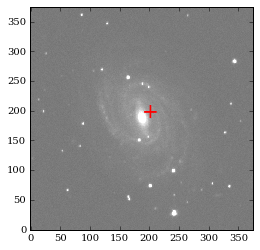

In [55]:
pyff.imshow(stamp['data'])
text(x0_obj,y0_obj, '+', fontsize=20, color='r')
gray()
show()

In [48]:

stampNpix = np.inner(*stamp['data'].shape)
teoNpix   = int((SZdeg**2/ framewcs.getPixelSizeDeg()**2))


stampNpix,teoNpix

fraction = '%.0f' % (100*stampNpix/teoNpix )
stamp['wcs'].header.update({'FLAGINC': (str(fraction), 'MFMTK: incomplete stamp, % in pixels') })

M,N = stamp['data'].shape
newSZdeg =    np.min((x0_ref, y0_ref, M - y0_ref, N - x0_ref )) * stamp['wcs'].getPixelSizeDeg()
stamp = astImages.clipImageSectionWCS(frame,framewcs, ra , dec, float(newSZdeg))


In [49]:
x0_obj, y0_obj = stamp['wcs'].wcs2pix(ra, dec)
ra_ref, dec_ref = stamp['wcs'].getCentreWCSCoords()
x0_ref, y0_ref  = stamp['wcs'].wcs2pix(ra_ref, dec_ref)
x0_obj, y0_obj, ra_ref, dec_ref, x0_ref, y0_ref

(187.31052321271943,
 188.04273483372413,
 309.09774005866655,
 -4.618766633999199,
 187.00000000001398,
 187.4999999999152)

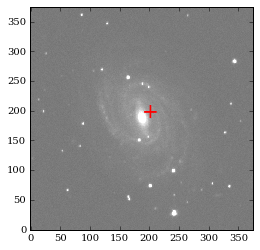

In [56]:
pyff.imshow(stamp['data'])
text(x0_obj,y0_obj, '+', fontsize=20, color='r')
gray()
show()

In [58]:
stamp['wcs'].getEquinox()


2000.0